In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings('ignore')
sns.set()

## Importing the Data

In [4]:
raw_data = yfinance.download(
    tickers = 'VOW3.DE, PAH3.DE, BMW.DE',
    interval = '1d',
    group_by = 'ticker',
    auto_adjust = True,
    treads = True)

[*********************100%***********************]  3 of 3 completed


In [5]:
df = raw_data.copy()

## Defining Key Dates

In [6]:
# Starting Date
start_date = '2009-04-05'

# First Official Announcement - 49.9%
ann_1 = '2009-12-09'

# Second Official Announcement - 50.1%
ann_2 = '2012-07-05'

# Ending Date
end_date = '2014-01-01'

## Pre-processing the Data

In [7]:
# Extracting Closing Prices
df['vol'] = df['VOW3.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close

# Creating Returns
df['ret_vol'] = df['vol'].pct_change(1).mul(100)
df['ret_por'] = df['por'].pct_change(1).mul(100)
df['ret_bmw'] = df['bmw'].pct_change(1).mul(100)

# Creating Squared Returns
df['sq_vol'] = df.ret_vol.mul(df.ret_vol)
df['sq_por'] = df.ret_por.mul(df.ret_por)
df['sq_bmw'] = df.ret_bmw.mul(df.ret_bmw)

# Extracting Volume
df['q_vol'] = df['VOW3.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume

In [8]:
# Assigning the Frequency and Filling NA Values
df = df.asfreq('b')
df = df.fillna(method = 'ffill')

In [9]:
# Removing Surplus data
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

## Plotting the Prices

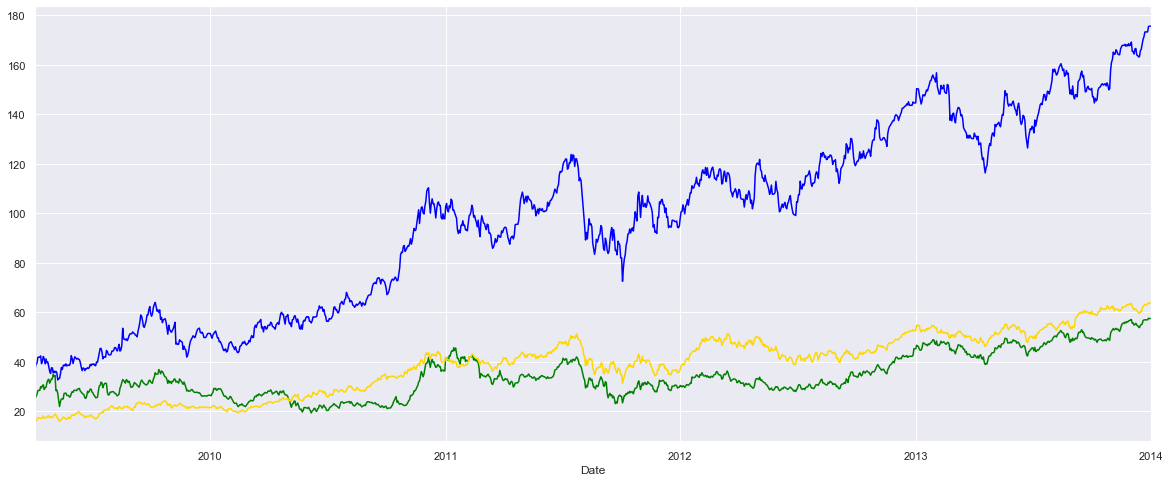

In [10]:
df['vol'][start_date:end_date].plot(figsize = (20, 8), color = 'blue')
df['por'][start_date:end_date].plot(color = 'green')
df['bmw'][start_date:end_date].plot(color = 'gold')
plt.show()

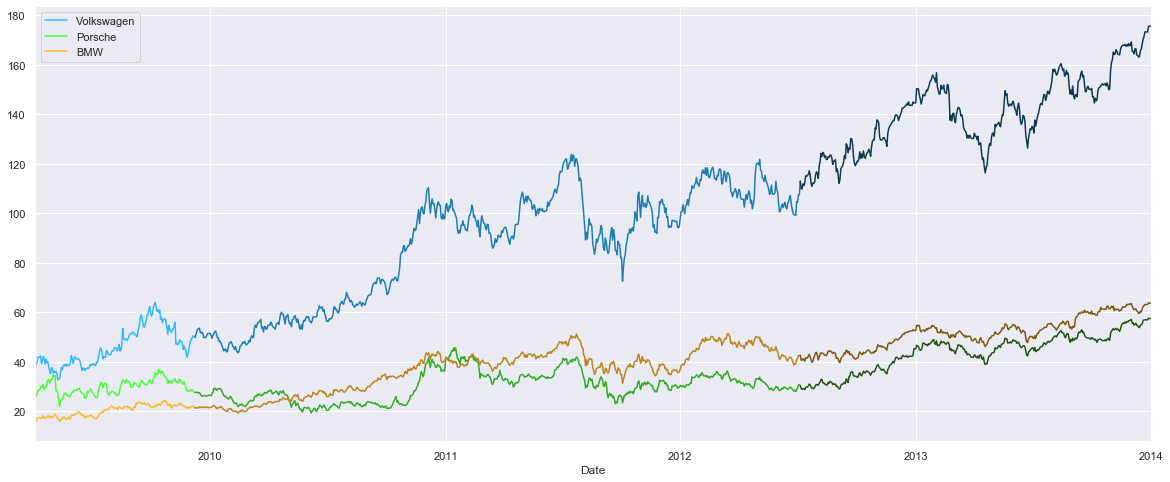

In [11]:
df['vol'][start_date:ann_1].plot(figsize = (20, 8), color = '#33B8FF')
df['por'][start_date:ann_1].plot(color = '#49FF3A')
df['bmw'][start_date:ann_1].plot(color = '#FEB628')

df['vol'][ann_1:ann_2].plot(color = '#1E7EB2')
df['por'][ann_1:ann_2].plot(color = '#2FAB25')
df['bmw'][ann_1:ann_2].plot(color = '#BA861F')

df['vol'][ann_2:end_date].plot(color = '#0E3A52')
df['por'][ann_2:end_date].plot(color = '#225414')
df['bmw'][ann_2:end_date].plot(color = '#7C5913')

plt.legend(['Volkswagen', 'Porsche', 'BMW'])
plt.show()

## Correlation

In [13]:
print('Correlation among manufactures from ' + str(start_date) + ' to ' + str(end_date) + '\n')
print('Volkswagen and Porsche Correlation: \t' + str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))
print('Volkswagen and BMW Correlation: \t' + str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))
print('Porsche and BMW Correlation: \t\t' + str(df['por'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

Correlation among manufactures from 2009-04-05 to 2014-01-01

Volkswagen and Porsche Correlation: 	0.8364635071268796
Volkswagen and BMW Correlation: 	0.9798969111003994
Porsche and BMW Correlation: 		0.8057254315392511


In [14]:
print('Correlation among manufactures from ' + str(start_date) + ' to ' + str(ann_1) + '\n')
print('Volkswagen and Porsche Correlation: \t' + str(df['vol'][start_date:ann_1].corr(df['por'][start_date:ann_1])))
print('Volkswagen and BMW Correlation: \t' + str(df['vol'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))
print('Porsche and BMW Correlation: \t\t' + str(df['por'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))

Correlation among manufactures from 2009-04-05 to 2009-12-09

Volkswagen and Porsche Correlation: 	0.6762282541239055
Volkswagen and BMW Correlation: 	0.8441704526543413
Porsche and BMW Correlation: 		0.6217078403466001


In [15]:
print('Correlation among manufactures from ' + str(ann_1) + ' to ' + str(ann_2) + '\n')
print('Volkswagen and Porsche Correlation: \t' + str(df['vol'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))
print('Volkswagen and BMW Correlation: \t' + str(df['vol'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))
print('Porsche and BMW Correlation: \t\t' + str(df['por'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))

Correlation among manufactures from 2009-12-09 to 2012-07-05

Volkswagen and Porsche Correlation: 	0.7434172851659602
Volkswagen and BMW Correlation: 	0.9795877977268146
Porsche and BMW Correlation: 		0.7051170454467403


In [16]:
print('Correlation among manufactures from ' + str(ann_2) + ' to ' + str(end_date) + '\n')
print('Volkswagen and Porsche Correlation: \t' + str(df['vol'][ann_2:end_date].corr(df['por'][ann_2:end_date])))
print('Volkswagen and BMW Correlation: \t' + str(df['vol'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))
print('Porsche and BMW Correlation: \t\t' + str(df['por'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))

Correlation among manufactures from 2012-07-05 to 2014-01-01

Volkswagen and Porsche Correlation: 	0.9409608952765978
Volkswagen and BMW Correlation: 	0.9291131054937131
Porsche and BMW Correlation: 		0.9497200146218722


## Best Fitting Models

### For Volkswagen

In [18]:
mod_pr_pre_vol = auto_arima(
    df.vol[start_date:ann_1],
    exogenous = df[['por', 'bmw']][start_date:ann_1],
    m = 5, max_p = 5, max_q = 5
)

mod_pr_btn_vol = auto_arima(
    df.vol[ann_1:ann_2],
    exogenous = df[['por', 'bmw']][ann_1:ann_2],
    m = 5, max_p = 5, max_q = 5
)

mod_pr_post_vol = auto_arima(
    df.vol[ann_2:end_date],
    exogenous = df[['por', 'bmw']][ann_2:end_date],
    m = 5, max_p = 5, max_q = 5
)

In [19]:
mod_pr_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -327.164
Date:                Thu, 18 Feb 2021   AIC                            664.327
Time:                        19:26:45   BIC                            680.236
Sample:                             0   HQIC                           670.779
                                - 178                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7465      0.458      1.631      0.103      -0.150       1.643
x1             0.4000      0.096      4.170      0.000       0.212       0.588
x2             0.6772      0.321      2.110      0.035       0.048       1.306
ar.L1          0.9630      0.020     48.641      0.000       0.924       1.002
sigma2         2.2782      0.155     14.721      0.000       1.975       2.582
===================================================================================
Ljung-Box (Q):                       38.62   Jarque-Bera (JB):               165.77
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -0.52
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
mod_pr_btn_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1087.067
Date:                Thu, 18 Feb 2021   AIC                           2186.135
Time:                        19:26:53   BIC                           2213.188
Sample:                             0   HQIC                          2196.613
                                - 672                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0020      0.001      3.811      0.000       0.001       0.003
x1             0.7830      0.061     12.859      0.000       0.664       0.902
x2             1.5302      0.071     21.687      0.000       1.392       1.668
ar.L1          0.9407      0.015     63.737      0.000       0.912       0.970
ma.L1         -0.9990      0.028    -35.095      0.000      -1.055      -0.943
sigma2         1.4809      0.086     17.260      0.000       1.313       1.649
===================================================================================
Ljung-Box (Q):                       28.94   Jarque-Bera (JB):                95.13
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.67   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
mod_pr_post_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  390
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -609.420
Date:                Thu, 18 Feb 2021   AIC                           1234.840
Time:                        19:27:04   BIC                           1266.549
Sample:                             0   HQIC                          1247.411
                                - 390                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0003      0.190     -0.002      0.999      -0.372       0.371
x1             1.6643      0.055     30.128      0.000       1.556       1.773
x2             0.8715      0.082     10.641      0.000       0.711       1.032
ar.L1         -1.0915      0.032    -34.402      0.000      -1.154      -1.029
ar.L2         -0.9104      0.030    -29.895      0.000      -0.970      -0.851
ma.L1          1.1351      0.042     26.943      0.000       1.053       1.218
ma.L2          0.9968      0.069     14.378      0.000       0.861       1.133
sigma2         1.3224      0.101     13.139      0.000       1.125       1.520
===================================================================================
Ljung-Box (Q):                       25.44   Jarque-Bera (JB):               108.49
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.38
Prob(H) (two-sided):                  0.20   Kurtosis:                         5.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### For Porsche

In [22]:
mod_pr_pre_por = auto_arima(
    df.por[start_date:ann_1],
    exogenous = df[['vol', 'bmw']][start_date:ann_1],
    m = 5, max_p = 5, max_q = 5
)

mod_pr_btn_por = auto_arima(
    df.por[ann_1:ann_2],
    exogenous = df[['vol', 'bmw']][ann_1:ann_2],
    m = 5, max_p = 5, max_q = 5
)

mod_pr_post_por = auto_arima(
    df.por[ann_2:end_date],
    exogenous = df[['vol', 'bmw']][ann_2:end_date],
    m = 5, max_p = 5, max_q = 5
)

In [23]:
mod_pr_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  178
Model:             SARIMAX(1, 0, 0)x(1, 0, 1, 5)   Log Likelihood                -229.653
Date:                           Thu, 18 Feb 2021   AIC                            473.307
Time:                                   19:31:10   BIC                            495.579
Sample:                                        0   HQIC                           482.339
                                           - 178                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1175      0.125      0.940      0.347      -0.127       0.362
x1             0.1411      0.052      2.701      0.007       0.039       0.243
x2             0.8279      0.169      4.900      0.000       0.497       1.159
ar.L1          0.9491      0.030     31.929      0.000       0.891       1.007
ar.S.L5        0.6435      0.259      2.481      0.013       0.135       1.152
ma.S.L5       -0.7814      0.240     -3.257      0.001      -1.252      -0.311
sigma2         0.7633      0.057     13.420      0.000       0.652       0.875
===================================================================================
Ljung-Box (Q):                       21.36   Jarque-Bera (JB):               409.79
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
mod_pr_btn_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  672
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 5)   Log Likelihood                -594.556
Date:                           Thu, 18 Feb 2021   AIC                           1205.111
Time:                                   19:31:11   BIC                           1241.182
Sample:                                        0   HQIC                          1219.082
                                           - 672                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0008      0.001     -0.841      0.400      -0.003       0.001
x1             0.1821      0.016     11.364      0.000       0.151       0.213
x2             0.3163      0.045      7.018      0.000       0.228       0.405
ar.L1          0.7469      0.191      3.902      0.000       0.372       1.122
ma.L1         -0.6858      0.208     -3.303      0.001      -1.093      -0.279
ar.S.L5        0.8706      0.099      8.766      0.000       0.676       1.065
ma.S.L5       -0.9104      0.082    -11.069      0.000      -1.072      -0.749
sigma2         0.3438      0.011     32.103      0.000       0.323       0.365
===================================================================================
Ljung-Box (Q):                       30.49   Jarque-Bera (JB):              1136.02
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                             0.04
Prob(H) (two-sided):                  0.02   Kurtosis:                         9.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
mod_pr_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  390
Model:             SARIMAX(0, 1, 0)x(0, 0, 1, 5)   Log Likelihood                -217.877
Date:                           Thu, 18 Feb 2021   AIC                            445.754
Time:                                   19:31:11   BIC                            465.572
Sample:                                        0   HQIC                           453.611
                                           - 390                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0210      0.020      1.057      0.290      -0.018       0.060
x1             0.2214      0.013     16.636      0.000       0.195       0.247
x2             0.2479      0.040      6.133      0.000       0.169       0.327
ma.S.L5       -0.1465      0.057     -2.549      0.011      -0.259      -0.034
sigma2         0.1794      0.007     26.394      0.000       0.166       0.193
===================================================================================
Ljung-Box (Q):                       33.77   Jarque-Bera (JB):               628.74
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions for the Future

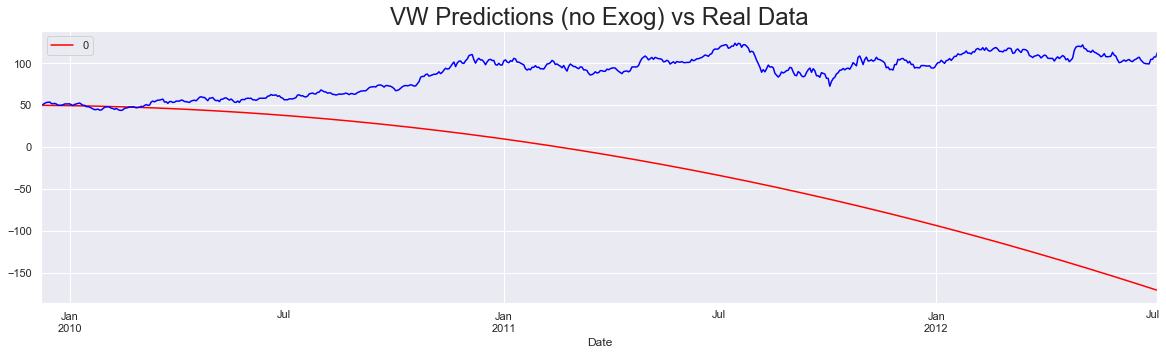

In [26]:
model_auto_pred_pr = auto_arima(
    df.vol[start_date:ann_1],
    m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = 'ct')

df_auto_pred_pr = pd.DataFrame(
    model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2])),
    index = df[ann_1:ann_2].index)

df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20, 5), color = 'red')
df.vol[ann_1:ann_2].plot(color = 'blue')
plt.title('VW Predictions (no Exog) vs Real Data', size = 24)
plt.show()